In [1]:
from data import Course
from ouc_course_tool.core import TableFetcher, CourseFetcher, AccountValidation
from ouc_course_tool.config import LoginConfig, CourseFetcherConfig, TableFetcherConfig
from ouc_course_tool.data.courses import TableFetcherParams

from tests.test_config import ConfigOfTest

In [18]:
test_config = ConfigOfTest('./tests/test_resource/account_local.ini')
tesseract_cmd_path = 'D:/Tools/Tesseract/tesseract.exe'

login_config = LoginConfig(test_config.get_username(), test_config.get_password(), tesseract_cmd_path)
session_id = AccountValidation(login_config).get_login_session_id()
username = test_config.get_username()

In [24]:
session_id = '0510122E8C7BACA5E93BECB965531D08'
username = '[USERNAME]'
# session_id = 'A0E725250BED0AB5D91E32C3199E1630'
# username = '[USERNAME]'

In [25]:
course_fetcher_config = CourseFetcherConfig(session_id=session_id)
course_fetcher = CourseFetcher(config=course_fetcher_config)
table_fetcher_config = TableFetcherConfig(session_id=session_id)
table_fetcher = TableFetcher(table_fetcher_config)
table_fetcher.set_search_param(TableFetcherParams(xh=username))

selection_number_list = table_fetcher.get_selection_number_list()
course_list = list(map(lambda selection_number: course_fetcher.get_course_by_selection_id(selection_number), selection_number_list))

over_flow = 0
for course in course_list:
    n1, n2 = int(course.limit), int(course.selected_count)
    print(course.course_name, str(n1) + "/" + str(n2), "!!!!!! 超出人数" + str(n2 - n1) if n1 < n2 else "")
    over_flow += n2 - n1 if n1 < n2 else 0
print('总计超出人数', over_flow)

总计超出人数 0


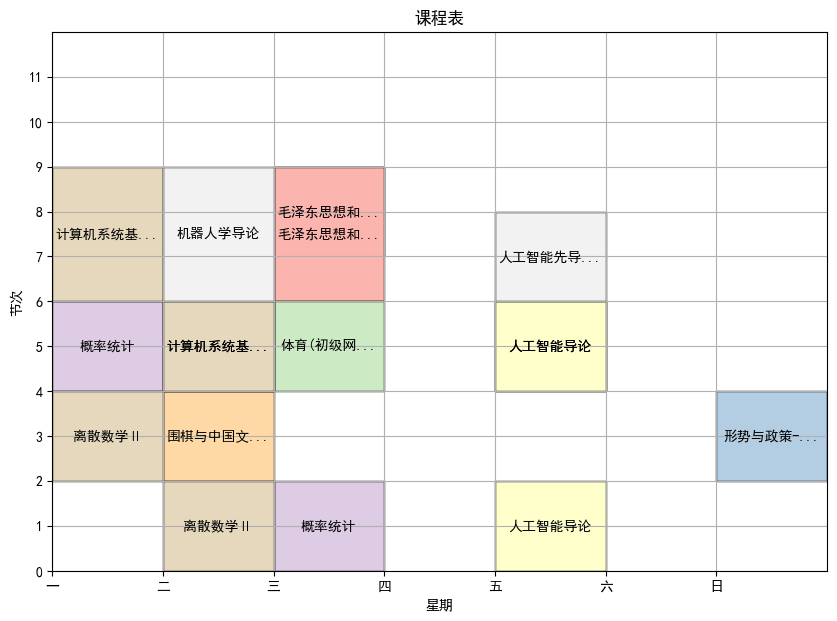

In [4]:
from ouc_course_tool.util.draw_function import draw_course_table
draw_course_table(course_list)